# Loan Grade Prediction

### Introduction

LendingTree is an online lending exchange that connects consumers with multiple lenders, banks, and credit partners who compete for business. LendingTree is not a direct supplier of loans; it is instead a broker. We will be working with LendingTree’s data to explore one of the oldest prediction problems – predicting risk on consumer loans.

This notebook is used to develop a statistical model for predicting the grade of a loan when a borrower submits a loan application.

### Business Problem

As a borrower, when submitting an loan application, you would wonder about your probability of being funded. LendingTree plays a role as broker to connect borrowers and lenders so LendingTree introduces a system so that it can measure the risk of a loan. In this project, we will try to imitate the LendingTree's system and give the borrowers their loan grade before submitting.

### Explore the dataset

First, we need to read the dataset

In [107]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # this is used for the plot the graph 
import numpy as np
%matplotlib inline

In [108]:
original_data = pd.read_csv("loan_data.csv", skiprows=1)
full_data = original_data.copy()

In [109]:
full_data.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,4600.0,4600.0,4600.0,36 months,11.39%,151.45,B,B3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,15400.0,15400.0,15400.0,60 months,11.39%,337.84,B,B3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,14000.0,14000.0,14000.0,36 months,15.99%,492.13,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,5000.0,5000.0,5000.0,36 months,25.49%,200.10,E,E4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,4700.0,4700.0,4700.0,36 months,15.99%,165.22,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


Then, let's see what kind of data we have in the dataset by list out all of the columns in the dataset

In [110]:
columns = list(full_data.columns.values)
print "Columns size:", len(columns)
columns

Columns size: 145


['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_

### Know the dataset

In this section, we would do some visualization so that we can get to know how our dataset is. In all of these columns, the outcome (what we want to predict) is the column called **grade**. It is the **Loan grade**. Based on each loan application and credit report, every loan is assigned a grade ranging from A1 to E5. 

Let's see the amount of each grade in our data.

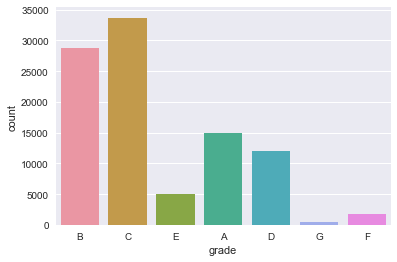

In [111]:
sb.set(style="darkgrid")
ax = sb.countplot(x="grade", data=full_data)

We could see that the amount of **G** and **F** are too small, the question is whether we should put these data to our model or not.

For this kind of data, when you have a lot of columns, we need intuition to get some core features out of the long list of columns. Because we predict for model, the **loan amount**, **loan term**, **annual income of borrower**, **application type**, **loan purpose** are the things we should consider first.

#### Loan Amount

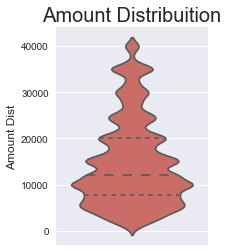

In [112]:
plt.subplot(122)
g1 = sb.violinplot(y="loan_amnt", data=full_data, 
               inner="quartile", palette="hls")
g1.set_xlabel("", fontsize=12)
g1.set_ylabel("Amount Dist", fontsize=12)
g1.set_title("Amount Distribuition", fontsize=20)

plt.show()

There are many loans in the dataset having the loan amount in range between 5000 to 20000. Let's see how the loan amount relating to the grade.

In [113]:
import operator
full_data.loc[operator.__and__(1000.0 <= full_data.loan_amnt, full_data.loan_amnt < 10000.0), 'loan_amnt_range'] = 0
full_data.loc[operator.__and__(10000.0 <= full_data.loan_amnt, full_data.loan_amnt < 20000.0), 'loan_amnt_range'] = 1
full_data.loc[operator.__and__(20000.0 <= full_data.loan_amnt, full_data.loan_amnt < 30000.0), 'loan_amnt_range'] = 2
full_data.loc[operator.__and__(30000.0 <= full_data.loan_amnt, full_data.loan_amnt < 40000.0), 'loan_amnt_range'] = 3
full_data.loc[40000.0 <= full_data.loan_amnt, 'loan_amnt_range'] = 4
cm = sb.light_palette("green", as_cmap=True)
pd.crosstab(full_data['grade'], full_data['loan_amnt_range']).style.background_gradient(cmap = cm)

loan_amnt_range,0.0,1.0,2.0,3.0,4.0
grade,,,,,
A,5907,5331,2124,1236,378
B,12243,10142,3812,2131,448
C,9873,13350,6530,3529,417
D,3243,4860,2354,1476,96
E,1072,2004,1280,665,35
F,196,810,462,261,6
G,29,229,151,97,2


#### Debt-to-Income (DTI)

Many lenders claim that DTI is considered as one of the important factors to decide whether they should fund a loan or not. So we start to see some data about DTI. DTI is calculated basing on the borrower's debt and the borrower's income.

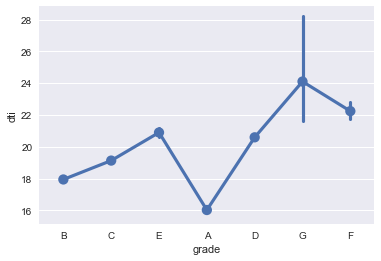

In [114]:
sb.pointplot(x="grade", y="dti", data=full_data)

The DTI indicates the chance your loan can be processed. The lower the DTI is, the higher the chance your loan can be funded. It is clearly seen that the _grade A_ loans have the lowest DTI. Therefore, we choose DTI as one of our core feature.

### Application Type

Text(0,0.5,'Loan Amount')

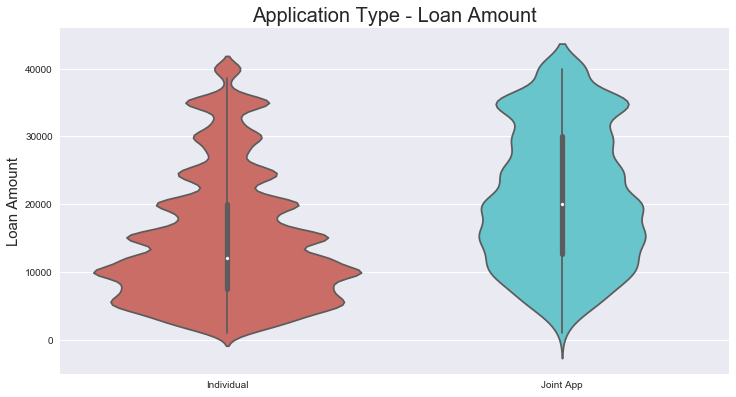

In [115]:
plt.figure(figsize = (12,14))
#The amount and int rate x application_type 
plt.subplot(211)
g = sb.violinplot(x="application_type", y="loan_amnt",data=full_data, 
            palette="hls")
g.set_title("Application Type - Loan Amount", fontsize=20)
g.set_xlabel("", fontsize=15)
g.set_ylabel("Loan Amount", fontsize=15)

Based on **application type**, a borrower can increase or decrease the loan amount. When **loan amount** is changed, the **grade** of loan is also changed. Therefore, **application type** is also considered as a good feature.

Now we get to know the dataset, next step is cleaning up the data and analysing the data.

### Clean up and Analyze the Data

In this problem, we would not consider the **sub grade** so we will drop all the data relating to **sub grade**.

In [116]:
full_data.drop(['sub_grade'], axis=1, inplace=True)
outcome = full_data[['grade']]
outcome.head(5)

,grade
0,B
1,B
2,C
3,E
4,C


Let's see how many grade we have to evaluate

In [117]:
outcome['grade'].unique()

array(['B', 'C', 'E', 'A', 'D', 'G', 'F', nan], dtype=object)

There are two things we need to do with the outcome dataset:
* We have _nan_ value in our dataset, so we will drop all the row having the _nan_ value.
* We need to transform all the outcome data into number so the model can understand it.

In [118]:
full_data = full_data[pd.notnull(full_data['grade'])]
map_grade = {"A":7,"B":6,"C":5,"D":4,"E":3,"F":2, 'G': 1}
full_data["grade"] = full_data["grade"].map(map_grade)
full_data['grade'].head(5)

0    6
1    6
2    5
3    3
4    5
Name: grade, dtype: int64

As we can see, now all the data relating to **grade** are transformed to number only. We have finished correct the outcome dataset.

#### Clean up the dataset

We remove all the data indicating id because it is unique for every row. The column **url** and **desc** are empty for all rows, we should remove them too. Moreover, all the information that a borrower can not give out by himself/herself should be remove because the model is built to help the borrowers evaluate their ability for a loan.

In [119]:
full_data.drop(['id', 'member_id', 'url', 'desc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
               'title', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_record',
               'open_acc', 'pub_rec', 'total_acc', 'initial_list_status', 'recoveries', 'collection_recovery_fee',
               'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code',
               'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'revol_bal_joint', 'payment_plan_start_date',
               'debt_settlement_flag_date', 'settlement_date','verification_status_joint'], axis=1, inplace=True)

All the information relates to the loan after being funded is not considered too.

In [120]:
full_data.drop(['funded_amnt_inv', 'funded_amnt', 'out_prncp', 
               'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
               'total_rec_int', 'total_rec_late_fee', 'last_pymnt_amnt', 'last_pymnt_d', 'next_pymnt_d',
               'last_credit_pull_d'], axis=1, inplace=True)

After cleaning up uncessary, let's see how many columns we have in the dataset.

In [121]:
columns = list(full_data.columns.values)
print "Columns size:", len(columns)
columns

Columns size: 104


['loan_amnt',
 'term',
 'int_rate',
 'installment',
 'grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'purpose',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'mths_since_last_delinq',
 'revol_bal',
 'revol_util',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'n

The **int_rate** is Interest Rate on the loan. It is decided based on the grade of the loan so we do not need this information too.

In [122]:
full_data.drop(['int_rate'], axis=1, inplace=True)

Next step, we will transform all categorical data into numbers because our model only understands numbers.

In [123]:
def convertEmploymentLength(l):
    if l == '< 1 year' or l == 'nan':
        return 0
    if l == '10+ years':
        return 10
    if l[1] == ' ':
        return (int)(l[:2])
    return (int)(l[:3])

def convert(data, listValue):
    return listValue.index(data)

def transformCategoricalData(df):
    result = df.copy()
    listPurpose = list(df['purpose'].unique())
    listOwnership = list(df['home_ownership'].unique())
    listAppType = list(df['application_type'].unique())
    listHardshipFlag = list(df['hardship_flag'].unique())
    listHSLoanStatus = list(df['hardship_loan_status'].unique())
    listDisbursement = list(df['disbursement_method'].unique())
    listDebtFlag = list(df['debt_settlement_flag'].unique())
    for index, row in result.iterrows():
        result.at[index, 'emp_length'] = convertEmploymentLength(row['emp_length'])
        result.at[index, 'purpose'] = convert(row.purpose, listPurpose)
        result.at[index, 'home_ownership'] = convert(row['home_ownership'], listOwnership)
        result.at[index, 'application_type'] = convert(row['application_type'], listAppType)
        result.at[index, 'hardship_flag'] = convert(row['hardship_flag'], listHardshipFlag)
        result.at[index, 'hardship_loan_status'] = convert(row['hardship_loan_status'], listHSLoanStatus)
        result.at[index, 'disbursement_method'] = convert(row['disbursement_method'], listDisbursement)
        result.at[index, 'debt_settlement_flag'] = convert(row['debt_settlement_flag'], listDebtFlag)
    return result

In [124]:
full_data['emp_length'] = full_data['emp_length'].astype('str') 
full_data = transformCategoricalData(full_data)
full_data.head(5)

,loan_amnt,term,installment,grade,emp_title,emp_length,home_ownership,annual_inc,purpose,zip_code,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,settlement_status,settlement_amount,settlement_percentage,settlement_term,loan_amnt_range
0,4600.0,36 months,151.45,6,cable technician,4,0,44470.0,0,066xx,...,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0.0
1,15400.0,60 months,337.84,6,Social worker,10,1,95000.0,1,068xx,...,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,1.0
2,14000.0,36 months,492.13,5,Project Leader,10,1,82000.0,0,672xx,...,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,1.0
3,5000.0,36 months,200.10,3,Pilot,10,1,215000.0,1,067xx,...,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0.0
4,4700.0,36 months,165.22,5,RN Manager,10,1,100046.0,1,847xx,...,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0.0


In [125]:
from sklearn.preprocessing import LabelEncoder
le_term = LabelEncoder()
full_data['term'] = le_term.fit_transform(full_data.term)
full_data.head(5)

,loan_amnt,term,installment,grade,emp_title,emp_length,home_ownership,annual_inc,purpose,zip_code,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,settlement_status,settlement_amount,settlement_percentage,settlement_term,loan_amnt_range
0,4600.0,0,151.45,6,cable technician,4,0,44470.0,0,066xx,...,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0.0
1,15400.0,1,337.84,6,Social worker,10,1,95000.0,1,068xx,...,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,1.0
2,14000.0,0,492.13,5,Project Leader,10,1,82000.0,0,672xx,...,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,1.0
3,5000.0,0,200.10,3,Pilot,10,1,215000.0,1,067xx,...,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0.0
4,4700.0,0,165.22,5,RN Manager,10,1,100046.0,1,847xx,...,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0.0


After transforming all of categorical data, I figure out some more columns that we need to remove because it just give more details about other columns.

In [126]:
full_data.drop(['emp_title', 'settlement_status','hardship_loan_status', 'hardship_dpd',
               'hardship_end_date', 'hardship_start_date', 'deferral_term', 'hardship_status', 'zip_code', ], axis=1, inplace=True)

We drop features that contain too many NA values. Let's count the NA values of each feature.

In [127]:
nullData = full_data.isnull().sum()
nullData[nullData > 0]

dti                                              33
mths_since_last_delinq                        46293
revol_util                                       51
annual_inc_joint                              92372
dti_joint                                     92372
mths_since_rcnt_il                             2596
il_util                                       12998
all_util                                          3
bc_open_to_buy                                  985
bc_util                                        1028
mo_sin_old_il_acct                             2596
mths_since_recent_bc                            945
mths_since_recent_bc_dlq                      72987
mths_since_recent_inq                         11314
mths_since_recent_revol_delinq                62320
num_tl_120dpd_2m                               4706
sec_app_earliest_cr_line                      95754
sec_app_inq_last_6mths                        95754
sec_app_mort_acc                              95754
sec_app_open

We have **96779** rows in our dataset but we can see that there are many features having NA values for over **90000** rows. So we will drop all the columns having NA values for over 90000 rows.

In [128]:
drop_columns = nullData[nullData > 90000].keys()
full_data.drop(drop_columns, axis=1, inplace=True)
full_data.head(5)

,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,...,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,loan_amnt_range
0,4600.0,0,151.45,6,4,0,44470.0,0,CT,13.43,...,0.0,0.0,40000.0,9625.0,14500.0,11700.0,0,0,0,0.0
1,15400.0,1,337.84,6,10,1,95000.0,1,CT,11.52,...,0.0,0.0,579945.0,158331.0,25800.0,143395.0,0,0,0,1.0
2,14000.0,0,492.13,5,10,1,82000.0,0,KS,31.07,...,0.0,0.0,286204.0,104008.0,81400.0,60167.0,0,0,0,1.0
3,5000.0,0,200.10,3,10,1,215000.0,1,CT,6.06,...,0.0,0.0,100763.0,44754.0,46200.0,49814.0,0,0,0,0.0
4,4700.0,0,165.22,5,10,1,100046.0,1,UT,12.37,...,0.0,0.0,353570.0,49114.0,3500.0,58668.0,0,0,0,0.0


Now let's explore the columns that have less NA values to decide whehter we should keep them or not

In [129]:
nullData = full_data.isnull().sum()
nullData[nullData > 0]

dti                                  33
mths_since_last_delinq            46293
revol_util                           51
mths_since_rcnt_il                 2596
il_util                           12998
all_util                              3
bc_open_to_buy                      985
bc_util                            1028
mo_sin_old_il_acct                 2596
mths_since_recent_bc                945
mths_since_recent_bc_dlq          72987
mths_since_recent_inq             11314
mths_since_recent_revol_delinq    62320
num_tl_120dpd_2m                   4706
dtype: int64

We will remove the **mths_since_last_delinq**, **mths_since_recent_bc_dlq** and **mths_since_recent_revol_delinq**. These information are not valuable enough and they have a lot of NA values.

In [130]:
full_data.drop(['revol_util', 'mths_since_last_delinq', 'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq'],
               axis=1, inplace=True)

In [131]:
nullData = full_data.isnull().sum()
nullData[nullData > 0]

dti                         33
mths_since_rcnt_il        2596
il_util                  12998
all_util                     3
bc_open_to_buy             985
bc_util                   1028
mo_sin_old_il_acct        2596
mths_since_recent_bc       945
mths_since_recent_inq    11314
num_tl_120dpd_2m          4706
dtype: int64

For all the rows not having value of dti, we remove them all.

In [132]:
full_data = full_data[pd.notnull(full_data['dti'])]

In [133]:
nullData = full_data.isnull().sum()
nullData[nullData > 0]

mths_since_rcnt_il        2593
il_util                  12987
all_util                     3
bc_open_to_buy             985
bc_util                   1028
mo_sin_old_il_acct        2593
mths_since_recent_bc       945
mths_since_recent_inq    11309
num_tl_120dpd_2m          4706
dtype: int64

All other columns, the **NA** value will be replaced by the mean value of the whole columns

In [134]:
nullData = nullData[nullData > 0]
for key in nullData.keys():
        full_data[key].fillna((full_data[key].mean()), inplace=True)

Let's see whether we have any columns having **NA** value.

In [135]:
nullData = full_data.isnull().sum()
nullData[nullData > 0]

Series([], dtype: int64)

Now we have cleaned up the dataset.

### Building Model
#### Model built by trying correlation for feature selection

To do this, we will calculate the correlation between the feature and the outcome. We will perform this for all of the columns

In [136]:
columns = list(full_data.columns.values)
columns.remove('grade')
list_feature = {}
for col in columns:
    if full_data[col].dtype == 'object':
        continue
    correlation = full_data['grade'].corr(full_data[col])
    if correlation != 0 or correlation:
        list_feature[abs(correlation)] = col

list_feature

{0.002620786330149851: 'num_tl_120dpd_2m',
 0.002868032739389746: 'total_bal_il',
 0.0035222474192166155: 'tot_coll_amt',
 0.0035585925454921143: 'delinq_amnt',
 0.0036375973043233545: 'open_act_il',
 0.004023268027440389: 'acc_now_delinq',
 0.004292827266843358: 'num_tl_30dpd',
 0.006582131284631973: 'chargeoff_within_12_mths',
 0.006670490590471688: 'num_il_tl',
 0.008411574606899636: 'num_sats',
 0.008874350070645975: 'total_bal_ex_mort',
 0.01021101360921158: 'num_op_rev_tl',
 0.013069087108569053: 'tax_liens',
 0.016008845532249506: 'num_bc_sats',
 0.018579573825558273: 'total_cu_tl',
 0.02100474562285495: 'num_tl_90g_dpd_24m',
 0.023471881436637122: 'revol_bal',
 0.024689047082319233: 'delinq_2yrs',
 0.02913894314658161: 'total_il_high_credit_limit',
 0.03537705174322993: 'annual_inc',
 0.040452044135531905: 'num_accts_ever_120_pd',
 0.046063934217445625: 'num_rev_accts',
 0.05269589449633636: 'mths_since_rcnt_il',
 0.05680901163814786: 'max_bal_bc',
 0.0579411790142707: 'num_act

Now we have a list of correlation of each feature. Now we need to sort this list descending so we always try the best correlation first.

In [137]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

def calculateAccuracy(features, data, outcome):
    sc = StandardScaler()
    X = pd.DataFrame(data, columns=features)
    y = data[outcome]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
    X_train = sc.fit_transform(X_train)
    X_test = sc.fit_transform(X_test)
    logistic = LogisticRegression()
    logistic.fit(X_train, y_train)
    return accuracy_score(y_test, logistic.predict(X_test))

def calculateAccuracyRF(features, data, outcome):
    sc = StandardScaler()
    X = pd.DataFrame(data, columns=features)
    y = data[outcome]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
    X_train = sc.fit_transform(X_train)
    X_test = sc.fit_transform(X_test)
    random_forest = RandomForestClassifier(max_depth=10, random_state=101, n_estimators=30)
    random_forest.fit(X_train, y_train)
    prediction = random_forest.predict(X_test)
    print len(features)
    print(classification_report(y_test, prediction))
    return accuracy_score(y_test, prediction)

In [138]:
correlation = list_feature.keys()
correlation.sort(reverse=True)

test_list_feature = [list_feature[x] for x in correlation[:10]]
results_LR = []
test_data = full_data.head(5000)
for i in range(11, len(correlation)):
    test_list_feature.append(list_feature[correlation[i]])
    results_LR.append(calculateAccuracy(test_list_feature, test_data, 'grade'))


Max accuracy:  0.5513333333333333
Number of features:  33


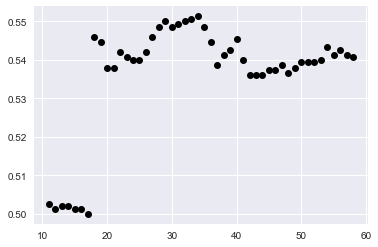

In [139]:
x = range(11, len(results_LR)+11)
y = results_LR
plt.plot(x, y, 'o', color='black')
print "Max accuracy: ", max(results_LR)
print "Number of features: ", results_LR.index(max(results_LR)) + 10

Based on the accuracy, we could achieve the highest at 0.55 with 33 features.

In [144]:
test_list_feature = [list_feature[x] for x in correlation[:10]]
results_RF = []
test_data = full_data.head(5000)
for i in range(11, len(correlation)):
    test_list_feature.append(list_feature[correlation[i]])
    results_RF.append(calculateAccuracyRF(test_list_feature, test_data, 'grade'))

11
             precision    recall  f1-score   support

          1       0.00      0.00      0.00         4
          2       0.00      0.00      0.00        25
          3       0.45      0.07      0.13        67
          4       0.20      0.02      0.04       147
          5       0.48      0.61      0.54       507
          6       0.43      0.51      0.47       484
          7       0.52      0.50      0.51       266

avg / total       0.43      0.46      0.43      1500



/Users/admin/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


12
             precision    recall  f1-score   support

          1       0.00      0.00      0.00         4
          2       0.00      0.00      0.00        25
          3       0.44      0.06      0.11        67
          4       0.19      0.02      0.04       147
          5       0.52      0.63      0.57       507
          6       0.46      0.59      0.52       484
          7       0.57      0.51      0.54       266

avg / total       0.46      0.50      0.46      1500



/Users/admin/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


13
             precision    recall  f1-score   support

          1       0.00      0.00      0.00         4
          2       0.00      0.00      0.00        25
          3       0.50      0.04      0.08        67
          4       0.21      0.02      0.04       147
          5       0.48      0.63      0.54       507
          6       0.44      0.53      0.48       484
          7       0.57      0.51      0.54       266

avg / total       0.45      0.48      0.44      1500



/Users/admin/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


14
             precision    recall  f1-score   support

          1       0.00      0.00      0.00         4
          2       0.00      0.00      0.00        25
          3       0.43      0.04      0.08        67
          4       0.21      0.03      0.05       147
          5       0.49      0.60      0.54       507
          6       0.42      0.54      0.47       484
          7       0.59      0.52      0.55       266

avg / total       0.45      0.47      0.44      1500



/Users/admin/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


15
             precision    recall  f1-score   support

          1       0.00      0.00      0.00         4
          2       0.00      0.00      0.00        25
          3       0.25      0.03      0.05        67
          4       0.33      0.02      0.04       147
          5       0.50      0.60      0.55       507
          6       0.44      0.60      0.51       484
          7       0.63      0.53      0.57       266

avg / total       0.47      0.49      0.46      1500



/Users/admin/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


16
             precision    recall  f1-score   support

          1       0.00      0.00      0.00         4
          2       0.00      0.00      0.00        25
          3       0.40      0.03      0.06        67
          4       0.17      0.01      0.03       147
          5       0.49      0.62      0.55       507
          6       0.44      0.57      0.50       484
          7       0.60      0.52      0.56       266

avg / total       0.45      0.49      0.45      1500



/Users/admin/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


17
             precision    recall  f1-score   support

          1       0.00      0.00      0.00         4
          2       0.00      0.00      0.00        25
          3       0.30      0.04      0.08        67
          4       0.22      0.01      0.03       147
          5       0.49      0.59      0.54       507
          6       0.44      0.59      0.51       484
          7       0.61      0.51      0.55       266

avg / total       0.45      0.48      0.45      1500



/Users/admin/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


18
             precision    recall  f1-score   support

          1       0.00      0.00      0.00         4
          2       0.00      0.00      0.00        25
          3       0.50      0.04      0.08        67
          4       0.29      0.04      0.07       147
          5       0.51      0.63      0.56       507
          6       0.46      0.58      0.51       484
          7       0.60      0.51      0.55       266

avg / total       0.47      0.50      0.46      1500



/Users/admin/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


19
             precision    recall  f1-score   support

          1       0.00      0.00      0.00         4
          2       0.00      0.00      0.00        25
          3       0.40      0.06      0.10        67
          4       0.09      0.01      0.01       147
          5       0.50      0.60      0.55       507
          6       0.46      0.61      0.52       484
          7       0.60      0.50      0.55       266

avg / total       0.45      0.49      0.46      1500



/Users/admin/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


20
             precision    recall  f1-score   support

          1       0.00      0.00      0.00         4
          2       0.00      0.00      0.00        25
          3       0.43      0.04      0.08        67
          4       0.25      0.02      0.04       147
          5       0.52      0.62      0.56       507
          6       0.47      0.62      0.53       484
          7       0.59      0.52      0.56       266

avg / total       0.48      0.51      0.47      1500



/Users/admin/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


21
             precision    recall  f1-score   support

          1       0.00      0.00      0.00         4
          2       0.00      0.00      0.00        25
          3       0.33      0.03      0.05        67
          4       0.19      0.02      0.04       147
          5       0.49      0.61      0.55       507
          6       0.45      0.58      0.51       484
          7       0.63      0.53      0.58       266

avg / total       0.46      0.49      0.46      1500



/Users/admin/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


22
             precision    recall  f1-score   support

          1       0.00      0.00      0.00         4
          2       0.00      0.00      0.00        25
          3       0.40      0.03      0.06        67
          4       0.40      0.04      0.07       147
          5       0.48      0.61      0.54       507
          6       0.44      0.56      0.49       484
          7       0.62      0.52      0.56       266

avg / total       0.47      0.48      0.45      1500



/Users/admin/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


23
             precision    recall  f1-score   support

          1       0.00      0.00      0.00         4
          2       0.00      0.00      0.00        25
          3       0.57      0.06      0.11        67
          4       0.18      0.01      0.03       147
          5       0.50      0.62      0.55       507
          6       0.45      0.57      0.50       484
          7       0.58      0.52      0.54       266

avg / total       0.46      0.49      0.45      1500



/Users/admin/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


24
             precision    recall  f1-score   support

          1       0.00      0.00      0.00         4
          2       0.00      0.00      0.00        25
          3       0.00      0.00      0.00        67
          4       0.40      0.03      0.05       147
          5       0.50      0.66      0.57       507
          6       0.47      0.58      0.52       484
          7       0.61      0.52      0.56       266

avg / total       0.47      0.51      0.47      1500



/Users/admin/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


25
             precision    recall  f1-score   support

          1       0.00      0.00      0.00         4
          2       0.00      0.00      0.00        25
          3       0.33      0.03      0.05        67
          4       0.08      0.01      0.01       147
          5       0.50      0.60      0.55       507
          6       0.46      0.59      0.52       484
          7       0.61      0.55      0.58       266

avg / total       0.45      0.49      0.46      1500



/Users/admin/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


26
             precision    recall  f1-score   support

          1       0.00      0.00      0.00         4
          2       0.00      0.00      0.00        25
          3       0.33      0.03      0.05        67
          4       0.29      0.01      0.03       147
          5       0.48      0.63      0.54       507
          6       0.45      0.54      0.49       484
          7       0.60      0.54      0.57       266

avg / total       0.46      0.48      0.45      1500



/Users/admin/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


27
             precision    recall  f1-score   support

          1       0.00      0.00      0.00         4
          2       0.00      0.00      0.00        25
          3       0.50      0.04      0.08        67
          4       0.11      0.01      0.01       147
          5       0.50      0.64      0.56       507
          6       0.45      0.54      0.49       484
          7       0.60      0.54      0.57       266

avg / total       0.45      0.49      0.45      1500



/Users/admin/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


28
             precision    recall  f1-score   support

          1       0.00      0.00      0.00         4
          2       0.00      0.00      0.00        25
          3       0.60      0.04      0.08        67
          4       0.25      0.02      0.04       147
          5       0.51      0.64      0.56       507
          6       0.47      0.60      0.53       484
          7       0.61      0.53      0.57       266

avg / total       0.48      0.51      0.47      1500



/Users/admin/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


29
             precision    recall  f1-score   support

          1       0.00      0.00      0.00         4
          2       0.00      0.00      0.00        25
          3       0.00      0.00      0.00        67
          4       0.33      0.01      0.01       147
          5       0.47      0.61      0.53       507
          6       0.45      0.57      0.50       484
          7       0.62      0.53      0.57       266

avg / total       0.45      0.48      0.44      1500



/Users/admin/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


30
             precision    recall  f1-score   support

          1       0.00      0.00      0.00         4
          2       0.00      0.00      0.00        25
          3       0.25      0.01      0.03        67
          4       0.00      0.00      0.00       147
          5       0.48      0.64      0.55       507
          6       0.44      0.53      0.48       484
          7       0.59      0.52      0.55       266

avg / total       0.42      0.48      0.44      1500



/Users/admin/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


31
             precision    recall  f1-score   support

          1       0.00      0.00      0.00         4
          2       0.00      0.00      0.00        25
          3       0.50      0.01      0.03        67
          4       0.15      0.01      0.03       147
          5       0.50      0.65      0.56       507
          6       0.47      0.58      0.52       484
          7       0.61      0.53      0.57       266

avg / total       0.47      0.50      0.46      1500



/Users/admin/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


32
             precision    recall  f1-score   support

          1       0.00      0.00      0.00         4
          2       0.00      0.00      0.00        25
          3       1.00      0.01      0.03        67
          4       0.25      0.01      0.01       147
          5       0.47      0.64      0.54       507
          6       0.44      0.52      0.48       484
          7       0.62      0.55      0.58       266

avg / total       0.48      0.48      0.44      1500



/Users/admin/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


33
             precision    recall  f1-score   support

          1       0.00      0.00      0.00         4
          2       0.00      0.00      0.00        25
          3       0.00      0.00      0.00        67
          4       0.10      0.01      0.01       147
          5       0.46      0.63      0.54       507
          6       0.46      0.53      0.49       484
          7       0.64      0.56      0.60       266

avg / total       0.43      0.49      0.45      1500



/Users/admin/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


34
             precision    recall  f1-score   support

          1       0.00      0.00      0.00         4
          2       0.00      0.00      0.00        25
          3       0.00      0.00      0.00        67
          4       0.00      0.00      0.00       147
          5       0.48      0.62      0.54       507
          6       0.45      0.57      0.50       484
          7       0.62      0.52      0.57       266

avg / total       0.42      0.49      0.45      1500



/Users/admin/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


35
             precision    recall  f1-score   support

          1       0.00      0.00      0.00         4
          2       0.00      0.00      0.00        25
          3       0.00      0.00      0.00        67
          4       0.38      0.02      0.04       147
          5       0.47      0.63      0.54       507
          6       0.46      0.57      0.51       484
          7       0.66      0.51      0.57       266

avg / total       0.46      0.49      0.45      1500



/Users/admin/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


36
             precision    recall  f1-score   support

          1       0.00      0.00      0.00         4
          2       0.00      0.00      0.00        25
          3       0.00      0.00      0.00        67
          4       0.20      0.01      0.01       147
          5       0.47      0.65      0.55       507
          6       0.46      0.54      0.50       484
          7       0.62      0.51      0.56       266

avg / total       0.44      0.49      0.45      1500



/Users/admin/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


37
             precision    recall  f1-score   support

          1       0.00      0.00      0.00         4
          2       0.00      0.00      0.00        25
          3       0.67      0.03      0.06        67
          4       0.12      0.01      0.01       147
          5       0.49      0.66      0.56       507
          6       0.46      0.56      0.50       484
          7       0.60      0.52      0.56       266

avg / total       0.46      0.50      0.46      1500



/Users/admin/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


38
             precision    recall  f1-score   support

          1       0.00      0.00      0.00         4
          2       0.00      0.00      0.00        25
          3       1.00      0.01      0.03        67
          4       0.00      0.00      0.00       147
          5       0.48      0.65      0.56       507
          6       0.44      0.53      0.48       484
          7       0.62      0.51      0.56       266

avg / total       0.46      0.48      0.44      1500



/Users/admin/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


39
             precision    recall  f1-score   support

          1       0.00      0.00      0.00         4
          2       0.00      0.00      0.00        25
          3       0.00      0.00      0.00        67
          4       0.33      0.02      0.04       147
          5       0.48      0.66      0.56       507
          6       0.45      0.54      0.49       484
          7       0.65      0.53      0.58       266

avg / total       0.46      0.49      0.45      1500



/Users/admin/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


40
             precision    recall  f1-score   support

          1       0.00      0.00      0.00         4
          2       0.00      0.00      0.00        25
          3       0.50      0.01      0.03        67
          4       0.14      0.01      0.01       147
          5       0.47      0.65      0.55       507
          6       0.46      0.54      0.50       484
          7       0.66      0.55      0.60       266

avg / total       0.46      0.49      0.45      1500



/Users/admin/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


41
             precision    recall  f1-score   support

          1       0.00      0.00      0.00         4
          2       0.00      0.00      0.00        25
          3       0.00      0.00      0.00        67
          4       0.12      0.01      0.01       147
          5       0.48      0.64      0.54       507
          6       0.46      0.56      0.50       484
          7       0.65      0.52      0.58       266

avg / total       0.44      0.49      0.45      1500



/Users/admin/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


42
             precision    recall  f1-score   support

          1       0.00      0.00      0.00         4
          2       0.00      0.00      0.00        25
          3       0.00      0.00      0.00        67
          4       0.00      0.00      0.00       147
          5       0.48      0.67      0.56       507
          6       0.46      0.53      0.49       484
          7       0.65      0.54      0.59       266

avg / total       0.43      0.49      0.45      1500



/Users/admin/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


43
             precision    recall  f1-score   support

          1       0.00      0.00      0.00         4
          2       0.00      0.00      0.00        25
          3       0.00      0.00      0.00        67
          4       0.33      0.01      0.03       147
          5       0.49      0.67      0.57       507
          6       0.47      0.56      0.51       484
          7       0.62      0.53      0.57       266

avg / total       0.46      0.50      0.46      1500



/Users/admin/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


44
             precision    recall  f1-score   support

          1       0.00      0.00      0.00         4
          2       0.00      0.00      0.00        25
          3       1.00      0.01      0.03        67
          4       0.17      0.01      0.03       147
          5       0.47      0.66      0.55       507
          6       0.47      0.54      0.50       484
          7       0.65      0.52      0.57       266

avg / total       0.48      0.49      0.45      1500



/Users/admin/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


45
             precision    recall  f1-score   support

          1       0.00      0.00      0.00         4
          2       0.00      0.00      0.00        25
          3       0.00      0.00      0.00        67
          4       0.33      0.01      0.03       147
          5       0.47      0.67      0.55       507
          6       0.47      0.55      0.50       484
          7       0.64      0.50      0.56       266

avg / total       0.46      0.49      0.45      1500



/Users/admin/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


46
             precision    recall  f1-score   support

          1       0.00      0.00      0.00         4
          2       0.00      0.00      0.00        25
          3       0.00      0.00      0.00        67
          4       0.20      0.01      0.03       147
          5       0.49      0.63      0.55       507
          6       0.46      0.60      0.52       484
          7       0.66      0.51      0.57       266

avg / total       0.45      0.50      0.46      1500



/Users/admin/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


47
             precision    recall  f1-score   support

          1       0.00      0.00      0.00         4
          2       0.00      0.00      0.00        25
          3       0.00      0.00      0.00        67
          4       0.00      0.00      0.00       147
          5       0.47      0.65      0.54       507
          6       0.46      0.54      0.49       484
          7       0.64      0.53      0.58       266

avg / total       0.42      0.49      0.45      1500



/Users/admin/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


48
             precision    recall  f1-score   support

          1       0.00      0.00      0.00         4
          2       0.00      0.00      0.00        25
          3       0.50      0.01      0.03        67
          4       0.14      0.01      0.01       147
          5       0.48      0.68      0.56       507
          6       0.47      0.53      0.50       484
          7       0.61      0.51      0.55       266

avg / total       0.46      0.49      0.45      1500



/Users/admin/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


49
             precision    recall  f1-score   support

          1       0.00      0.00      0.00         4
          2       0.00      0.00      0.00        25
          3       1.00      0.01      0.03        67
          4       0.00      0.00      0.00       147
          5       0.48      0.66      0.56       507
          6       0.48      0.58      0.53       484
          7       0.62      0.50      0.56       266

avg / total       0.47      0.50      0.46      1500



/Users/admin/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


50
             precision    recall  f1-score   support

          1       0.00      0.00      0.00         4
          2       0.00      0.00      0.00        25
          3       1.00      0.01      0.03        67
          4       0.14      0.01      0.01       147
          5       0.48      0.68      0.56       507
          6       0.46      0.52      0.49       484
          7       0.64      0.51      0.57       266

avg / total       0.48      0.49      0.45      1500



/Users/admin/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


51
             precision    recall  f1-score   support

          1       0.00      0.00      0.00         4
          2       0.00      0.00      0.00        25
          3       1.00      0.03      0.06        67
          4       0.17      0.01      0.01       147
          5       0.49      0.66      0.56       507
          6       0.47      0.58      0.52       484
          7       0.62      0.50      0.55       266

avg / total       0.49      0.50      0.46      1500



/Users/admin/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


52
             precision    recall  f1-score   support

          1       0.00      0.00      0.00         4
          2       0.00      0.00      0.00        25
          3       0.00      0.00      0.00        67
          4       0.12      0.01      0.01       147
          5       0.49      0.68      0.57       507
          6       0.48      0.57      0.52       484
          7       0.64      0.50      0.56       266

avg / total       0.45      0.50      0.46      1500



/Users/admin/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


53
             precision    recall  f1-score   support

          1       0.00      0.00      0.00         4
          2       0.00      0.00      0.00        25
          3       0.00      0.00      0.00        67
          4       0.25      0.01      0.03       147
          5       0.47      0.68      0.55       507
          6       0.47      0.52      0.49       484
          7       0.64      0.50      0.56       266

avg / total       0.45      0.49      0.45      1500



/Users/admin/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


54
             precision    recall  f1-score   support

          1       0.00      0.00      0.00         4
          2       0.00      0.00      0.00        25
          3       0.00      0.00      0.00        67
          4       0.22      0.01      0.03       147
          5       0.47      0.67      0.55       507
          6       0.45      0.53      0.49       484
          7       0.65      0.53      0.58       266

avg / total       0.44      0.49      0.45      1500



/Users/admin/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


55
             precision    recall  f1-score   support

          1       0.00      0.00      0.00         4
          2       0.00      0.00      0.00        25
          3       0.00      0.00      0.00        67
          4       0.25      0.01      0.01       147
          5       0.48      0.65      0.55       507
          6       0.45      0.55      0.49       484
          7       0.61      0.52      0.56       266

avg / total       0.44      0.49      0.45      1500



/Users/admin/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


56
             precision    recall  f1-score   support

          1       0.00      0.00      0.00         4
          2       0.00      0.00      0.00        25
          3       0.00      0.00      0.00        67
          4       0.29      0.01      0.03       147
          5       0.48      0.70      0.57       507
          6       0.47      0.54      0.50       484
          7       0.66      0.49      0.56       266

avg / total       0.46      0.50      0.46      1500



/Users/admin/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


57
             precision    recall  f1-score   support

          1       0.00      0.00      0.00         4
          2       0.00      0.00      0.00        25
          3       0.00      0.00      0.00        67
          4       0.50      0.01      0.03       147
          5       0.49      0.64      0.55       507
          6       0.45      0.58      0.51       484
          7       0.64      0.50      0.56       266

avg / total       0.47      0.49      0.45      1500



/Users/admin/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


58
             precision    recall  f1-score   support

          1       0.00      0.00      0.00         4
          2       0.00      0.00      0.00        25
          3       0.00      0.00      0.00        67
          4       0.29      0.01      0.03       147
          5       0.47      0.64      0.54       507
          6       0.45      0.55      0.50       484
          7       0.64      0.50      0.56       266

avg / total       0.44      0.48      0.44      1500



/Users/admin/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Max accuracy:  0.5066666666666667
Number of features:  27


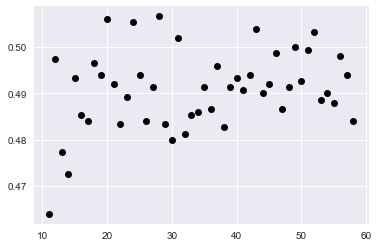

In [145]:
x = range(11, len(results_RF)+11)
y = results_RF
plt.plot(x, y, 'o', color='black');
print "Max accuracy: ", max(results_RF)
print "Number of features: ", results_RF.index(max(results_RF)) + 10

With **Random Forest** model, we achieve the accuracy lower than **Logistic Regression** model. However, because our data varies a lot and we just perform **StandardScaler** for our data only, we should choose **Random Forest** over **Logistic Regression**. 

### Model built by Recursive Feature Selection

I try to to do another algorithm that helps to select the best features. Now, we do not care about the correlation. We use **Recursive Feature Selection** algorithm to rank the features.

In [88]:
def tryCorrelation(outcome, useRF):
    correlation = list_feature.keys()
    correlation.sort(reverse=True)

    test_list_feature = [list_feature[x] for x in correlation[:10]]
    results_LR = []
    test_data = full_data.head(5000)
    for i in range(11, len(correlation)):
        test_list_feature.append(list_feature[correlation[i]])
        if useRF:
            results_LR.append(calculateAccuracyRF(test_list_feature, test_data, outcome))
        else:
            results_LR.append(calculateAccuracy(test_list_feature, test_data, outcome))
    x = range(11, len(results_LR)+11)
    y = results_RF
    plt.plot(x, y, 'o', color='black');

tryCorrelation('grade_C', False)

In [142]:
from sklearn.linear_model import RandomizedLasso
from sklearn.feature_selection import RFE

data = full_data.head(5000)
X = pd.DataFrame(data, columns=list_feature.values())
y = data['grade']
 
#use linear regression as the model
lr = LogisticRegression()
#rank all features, i.e continue the elimination until the last one
rfe = RFE(lr, n_features_to_select=1)
rfe.fit(X,y)
map_ranking = sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), list(X.columns.values)))

In [143]:
ranking, feature =  zip(*map_ranking)
map_ranking

[(1.0, 'term'),
 (2.0, 'chargeoff_within_12_mths'),
 (3.0, 'pub_rec_bankruptcies'),
 (4.0, 'open_acc_6m'),
 (5.0, 'open_il_12m'),
 (6.0, 'tax_liens'),
 (7.0, 'num_tl_90g_dpd_24m'),
 (8.0, 'open_rv_24m'),
 (9.0, 'num_sats'),
 (10.0, 'open_act_il'),
 (11.0, 'num_op_rev_tl'),
 (12.0, 'delinq_2yrs'),
 (13.0, 'loan_amnt_range'),
 (14.0, 'acc_open_past_24mths'),
 (15.0, 'open_il_24m'),
 (16.0, 'num_rev_tl_bal_gt_0'),
 (17.0, 'open_rv_12m'),
 (18.0, 'num_tl_op_past_12m'),
 (19.0, 'mort_acc'),
 (20.0, 'inq_fi'),
 (21.0, 'num_actv_rev_tl'),
 (22.0, 'num_accts_ever_120_pd'),
 (23.0, 'num_bc_sats'),
 (24.0, 'num_actv_bc_tl'),
 (25.0, 'delinq_amnt'),
 (26.0, 'num_bc_tl'),
 (27.0, 'inq_last_12m'),
 (28.0, 'mths_since_rcnt_il'),
 (29.0, 'mo_sin_rcnt_tl'),
 (30.0, 'mo_sin_rcnt_rev_tl_op'),
 (31.0, 'total_cu_tl'),
 (32.0, 'num_il_tl'),
 (33.0, 'num_rev_accts'),
 (34.0, 'tot_coll_amt'),
 (35.0, 'mths_since_recent_inq'),
 (36.0, 'mths_since_recent_bc'),
 (37.0, 'dti'),
 (38.0, 'all_util'),
 (39.0, 'bc_u

As we can see, some of features such as **DTI** or **loan amount** are ranked low, which means it is the best feature and we should not eliminate them. From the previous work, we could identify that around 28 features will give out the highest recall.

In [146]:
list_top_feature = []
for i in range(0, len(ranking)):
    if ranking[i] >= 31.0:
        list_top_feature.append(feature[i])
        
list_top_feature

['total_cu_tl',
 'num_il_tl',
 'num_rev_accts',
 'tot_coll_amt',
 'mths_since_recent_inq',
 'mths_since_recent_bc',
 'dti',
 'all_util',
 'bc_util',
 'il_util',
 'installment',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'loan_amnt',
 'revol_bal',
 'total_rev_hi_lim',
 'max_bal_bc',
 'total_bc_limit',
 'avg_cur_bal',
 'tot_cur_bal',
 'tot_hi_cred_lim',
 'total_bal_ex_mort',
 'total_bal_il',
 'acc_now_delinq',
 'bc_open_to_buy',
 'num_tl_30dpd',
 'annual_inc',
 'total_il_high_credit_limit',
 'num_tl_120dpd_2m']

In [147]:
calculateAccuracyRF(list_top_feature, full_data, 'grade')

29
             precision    recall  f1-score   support

          1       0.00      0.00      0.00       148
          2       0.00      0.00      0.00       538
          3       0.67      0.00      0.01      1552
          4       0.80      0.06      0.10      3507
          5       0.44      0.72      0.54     10042
          6       0.46      0.47      0.46      8683
          7       0.58      0.44      0.50      4554

avg / total       0.51      0.46      0.42     29024



/Users/admin/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.46337513781697903

As we can see, if we use the **Recursive Feature Selection**, both the accuracy and recall is lower than the previous model. So we will stick to the first model.

In [148]:
test_list_feature = [list_feature[x] for x in correlation[:28]]
calculateAccuracyRF(test_list_feature, full_data, 'grade')

28
             precision    recall  f1-score   support

          1       1.00      0.01      0.01       148
          2       0.71      0.06      0.12       538
          3       0.68      0.05      0.09      1552
          4       0.69      0.05      0.10      3507
          5       0.49      0.70      0.58     10042
          6       0.49      0.60      0.54      8683
          7       0.65      0.51      0.57      4554

avg / total       0.56      0.51      0.47     29024



0.5128169790518192

This is our last model with the accuracy of 0.51 and recall of 0.51 with 7 classifier.

###  Further Investigation

This section will answer the question _"Whether we should remove the data of grade E, F and G"_. What if we narrow our prediction to only predict the good loan. Do we increase the accuracy and recall.

In [153]:
filter_full_data = full_data[full_data['grade'] > 4]

In [154]:
test_list_feature = [list_feature[x] for x in correlation[:28]]
calculateAccuracyRF(test_list_feature, filter_full_data, 'grade')

28
             precision    recall  f1-score   support

          5       0.73      0.72      0.72     10115
          6       0.54      0.61      0.57      8590
          7       0.66      0.52      0.58      4522

avg / total       0.64      0.64      0.64     23227



0.6389546648297241

As we can see, the accuracy and recall increase a lot because we remove grade **D**, **E**, **F** and **G**. The problem is that we lack of data of these grades. That's why our accuracy and recall are affected.

### Conclusion

By building the model, we find out some features affecting directly to the loan grade such as loan amount, application type, DTI or employment length. Here is the list of features we chose to put in the model.

In [155]:
test_list_feature

['term',
 'bc_open_to_buy',
 'all_util',
 'bc_util',
 'acc_open_past_24mths',
 'num_tl_op_past_12m',
 'total_bc_limit',
 'inq_last_12m',
 'open_rv_24m',
 'installment',
 'open_rv_12m',
 'open_il_12m',
 'total_rev_hi_lim',
 'open_acc_6m',
 'tot_hi_cred_lim',
 'mo_sin_old_rev_tl_op',
 'inq_fi',
 'open_il_24m',
 'loan_amnt',
 'mort_acc',
 'loan_amnt_range',
 'mths_since_recent_inq',
 'il_util',
 'dti',
 'tot_cur_bal',
 'mo_sin_rcnt_rev_tl_op',
 'avg_cur_bal',
 'mo_sin_rcnt_tl']

### Future Work

With some experiences in this field, I know there are many aspects when it comes to evaluate a risk of a loan. In the future, we would like to shorten the list of features to 15 features only. We also need to collect more data about bad loans and some missing data such as **FICO score**, **personal information** of borrowers, ...